# Friedman test 

In [40]:
import numpy as np
from scipy.stats import friedmanchisquare
import scikit_posthocs as sp
import pandas as pd
model_names = ['LR','MLP','CNN'] #columns
measures = ["Accuracy","Precision_C1","Recall_C1","F1-score_C1","Precision_C2","Recall_C2","F1-score_C2"] #rows
            
accuracies = np.array( [[70.14,	70,	84.38],
                        [0.72, 0.67, 0.85],
                        [0.77, 0.89, 0.89],
                        [0.74, 0.76, 0.87],
                        [0.67, 0.75, 0.85],
                        [0.62, 0.43, 0.8 ],
                        [0.64, 0.54, 0.82]])


# Perform the Friedman's test
# statistic, p_value = friedmanchisquare(*(ranks.T))
statistic, p_value = friedmanchisquare(*(accuracies.T))
print("Friedman's test statistic:", statistic)
print("p-value:", p_value)
pd.DataFrame(accuracies,columns=model_names,index=measures )

Friedman's test statistic: 9.407407407407405
p-value: 0.00906165319513779


,LR,MLP,CNN
Accuracy,70.14,70.00,84.38
Precision_C1,0.72,0.67,0.85
Recall_C1,0.77,0.89,0.89
F1-score_C1,0.74,0.76,0.87
Precision_C2,0.67,0.75,0.85
Recall_C2,0.62,0.43,0.80
F1-score_C2,0.64,0.54,0.82


The Friedman's test statistic of 9.407 and the p-value of 0.0091 suggest that there is a significant difference in the performance of the classifiers.

Looking at the performance metrics, we can see that CNN has the highest accuracy at 84.38%. For class 2, CNN has the highest precision, recall, and F1-score, while for class 1, CNN and MLP have the highest precision, respectively. So, we will use the Nemenyi test also here.
The Nemenyi test is a post-hoc test used to determine which pairs of models differ significantly from each other after performing a Friedman test. The test is based on the ranks of the models and uses a critical value based on the Studentized range distribution to determine if the difference between two models is significant at a specified level of significance.


# Nemenyi test 

In [43]:
# Conduct the Nemenyi post-hoc test
nemenyi = sp.posthoc_nemenyi_friedman(accuracies)
nemenyi.columns = model_names
nemenyi.index = model_names
nemenyi

,LR,MLP,CNN
LR,-1.000000,0.900000,0.029915
MLP,0.900000,-1.000000,0.020573
CNN,0.029915,0.020573,-1.000000


The table suggests that there are statistically significant differences between the performance of the three models on the task being evaluated. The LR and MLP models appear to be more similar in performance than either of them is to the CNN model.

(<AxesSubplot:>, <matplotlib.colorbar.Colorbar at 0x1d6064a6ee0>)

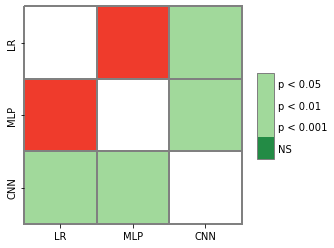

In [42]:
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sp.sign_plot(nemenyi, **heatmap_args)